In [1]:
import pandas as pd
from sklearn.cluster import KMeans

In [25]:
#df = pd.read_csv('/data/doc2vec/results_1576094473.csv', index_col=0, header=None)
df = pd.read_csv('/home/federico.nanni/words_d2v_results_.csv', index_col=0, header=None)


In [26]:
X = df.to_numpy()
# del df

In [15]:
#kmeans = KMeans(n_clusters=20, random_state=0).fit(X)


# K-means clustering given N x d matrix of document embeddings

def fit_kmeans(X,k=5):
    kmeans=KMeans(n_clusters=k,precompute_distances=True, # note requires more memory but faster
                    n_jobs=10,verbose=1).fit(X)
    return kmeans

no_clusters=20
#kmeans = fit_kmeans(X,k=no_clusters)


In [13]:
kmeans.labels_


(357831,)

In [16]:
import numpy as np
np.unique(kmeans.labels_,return_counts=True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int32),
 array([ 5874,  6356,  7477,  7081, 33082, 12678, 11275,  8177, 11951,
        81274, 70221,  4071,  6745, 64240,  7311,     2,  2690,  4986,
         1870, 10470]))

In [20]:
centroids=kmeans.cluster_centers_
centroids

array([[ 0.04473466, -0.10847677,  0.02660487, ...,  0.04608456,
         0.14697363, -0.1546492 ],
       [-0.02014614,  0.03633449, -0.20384708, ..., -0.28246147,
         0.10725395, -0.19193574],
       [ 0.1463134 , -0.06941426, -0.01327746, ..., -0.07848075,
         0.24944903,  0.01675988],
       ...,
       [ 0.01494462, -0.0285575 ,  0.03710692, ...,  0.1394043 ,
         0.01654542, -0.05059166],
       [-0.03433764, -0.00828144,  0.01130883, ..., -0.04398028,
         0.27780035,  0.03266306],
       [ 0.14192798, -0.00756931, -0.05087665, ...,  0.02723381,
        -0.01384173,  0.00911564]])

In [27]:
cluster_dict={k:X[kmeans.labels_==k] for k in range(no_clusters)}

#df.index[kmeans.labels_==k].tolist()




In [39]:
from scipy.spatial import KDTree
kdtree_dict={k:KDTree(cluster_dict[k]) for k in range(no_clusters)}
nearest_nbrs={k:kdtree_dict[k].query(centroids[k],min(len(cluster_dict[k]),100))[1] for k in range(no_clusters)}

In [41]:
nearest_nbrs_path={k:df.index[nearest_nbrs[k]] for k in range(no_clusters)}

In [123]:
import json
from collections import Counter
most_common_ents={}
stop_words=['UK', 'today', 'Britain', 'first', 'iPad', 'British', 'one', 'National Insurance','EU',
           'Europe', 'the Government Digital Service Open Government Licence',
           '© Crown','Android','iPhone','Policies Publications Consultations Statistics Announcements',
           'Send Services', 'Benefits Births','Rhestr o', 'Wasanaethau Cymraeg',
           'Retina', 'second', 'iPod Touch','Departments Worldwide Topics Policies Publications Announcements',
            'non-Retina','TB','Departments Topics', 'the Government Digital Service']
#print(stop_words)
for k,v in nearest_nbrs_path.items():
    cnt=Counter()
    for path in v:
        for i in range(1,11):
            try:
                full_path='/data/entities/result'+str(i)+'/'+path
                #print(path)
                #print(full_path)
                with open(full_path) as f:
                    entities=json.load(f)
                    #print(entitities)
                    flattened = [text[0] for type in entities for text in entities[type]]
                    flattened=[word for word in flattened if word not in stop_words]
                    #print(flattened)
                    
                    cnt.update(flattened)
            except:
                continue
    #print(cnt)
    most_common_ents[k]=[x[0] for x in cnt.most_common(10)]
    


In [124]:
for k,cntr in most_common_ents.items():
    print("Top 10 terms in cluster {} are: {}".format(k,cntr))

Top 10 terms in cluster 0 are: ['Afghanistan', 'two', 'Brazil', 'Parliament', 'London', 'China', 'Nigeria', 'India', 'third', 'the 2010 to 2015']
Top 10 terms in cluster 1 are: ['Wales', 'Parliament', 'London', 'Commission', 'England', 'CMA', 'European', 'the 2010 to 2015', 'Liberal Democrat coalition', 'two']
Top 10 terms in cluster 2 are: ['China', 'Commonwealth', 'two', 'Parliament', 'Afghanistan', 'three', 'Bill', 'Iran', 'Liberal Democrat coalition', 'House']
Top 10 terms in cluster 3 are: ['London', 'Parliament', 'Singapore', 'Wales', 'Ukraine', 'Russia', 'England', 'US', 'Liberal Democrat coalition', 'two']
Top 10 terms in cluster 4 are: ['Wales', 'Russia', 'China', 'First', 'US', 'two', 'Parliament', 'European', 'London', 'the 2010 to 2015']
Top 10 terms in cluster 5 are: ['NHS', 'China', 'Parliament', 'London', 'Northern Ireland', 'early years', 'two', 'third', 'the 2010 to 2015', 'First']
Top 10 terms in cluster 6 are: ['BBC', 'London', 'European', 'Hong Kong', 'Parliament', 

In [97]:
import os

def finder(name,path):
    for root, dirr, files in os.walk(path):
        if name in files:
            return os.path.join(root,name)
        


{'Benefits Births',
 'EU',
 'Europe',
 'Liberal Democrat coalition',
 'National Insurance',
 'Rhestr o',
 'Send Services',
 'UK',
 'Wasanaethau Cymraeg',
 'first',
 'one',
 'the 2010 to 2015',
 'the Government Digital Service Open Government Licence',
 'the United Kingdom',
 'today',
 'two',
 '© Crown'}

In [128]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,kmeans.labels_,sample_size=10000)

In [6]:
import numpy as np
u, s, vh = np.linalg.svd(X,full_matrices=False)

In [129]:
score

-0.04984471313963588

In [130]:
kmeans2 = fit_kmeans(X,k=5)

In [131]:
score2=silhouette_score(X,kmeans2.labels_,sample_size=10000)
score2

0.04844769341535477

In [ ]:
kmeans3=fit_kmeans(X,k=10)

In [ ]:
score3=silhouette_score(X,kmeans3.labels_,sample_size=10000)

In [ ]:
score3

In [136]:
kmeans4=fit_kmeans(X,k=3)
score4=silhouette_score(X,kmeans4.labels_,sample_size=10000)
score4

0.04074352330788827

In [16]:
kmeans5=fit_kmeans(X,k=2)
score5=silhouette_score(X,kmeans5.labels_,sample_size=10000)

NameError: name 'silhouette_score' is not defined

In [138]:
score5

0.12757076376311166

In [139]:
s

array([697.4309388 , 421.63166507, 276.59804004, 266.40472702,
       246.55416441, 238.85851536, 232.32140961, 231.03891876,
       222.20700209, 219.65083091, 217.22634132, 216.32792767,
       214.13637076, 213.41701703, 209.63327724, 207.02425369,
       206.06710083, 204.57428135, 203.47508095, 201.23711366,
       200.20811625, 198.84747607, 197.33670085, 196.75874841,
       195.7641044 , 195.32662868, 193.70003595, 193.32040704,
       191.77691774, 191.20735706, 189.8047651 , 187.93522686,
       187.34116909, 185.58992748, 185.04327975, 183.22983556,
       182.90887732, 182.0031071 , 181.24338926, 180.38014129,
       179.31995385, 178.76242518, 177.60985001, 176.00235394,
       175.85064153, 174.74465264, 173.25939227, 172.76057255,
       171.9242275 , 171.56896392, 170.88704597, 170.03645191,
       169.47255219, 168.1957213 , 167.77864829, 165.20360702,
       164.83969347, 164.09142898, 163.70459078, 163.00374454,
       161.63770121, 160.26281321, 159.82413132, 159.56

In [19]:
#TSNE takes too long ;(
#from sklearn.manifold import TSNE

#tsne=TSNE(n_components=2,verbose=1,perplexity=40,n_iter=300)
#tsne_results=tsne.fit_transform(red_X)

from sklearn.decomposition import PCA 
pca=PCA(n_components=3)
pca_result=pca.fit_transform(X)


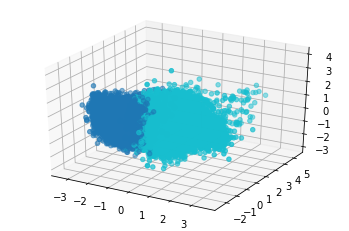

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt


df2=pd.DataFrame({'x':pca_result[:,0],'y':pca_result[:,1],'z':pca_result[:,2]})
df2['hue']=kmeans5.labels_
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(xs=df2['x'],ys=df2['y'],zs=df2['z'],c=df2['hue'],cmap='tab10')
#sns.scatterplot(
#            x='x',y='y',z='z',hue='hue',
#            palette=sns.color_palette('hls',2),
#            data=df2,legend='full',alpha=0.3)
plt.show()


In [7]:
smat=np.diag(s)
red_X=np.dot(u[:,:20],smat[:20,:20])

In [9]:
red_X.shape

(357831, 20)